## 5. Perzeptoren und Adaline
## 5.1 Perzeptoren
Perzeptronen sind grundlegende Bausteine im Bereich des Machine Learning, insbesondere in den künstlichen neuronalen Netzen. Sie sind eine Art von künstlichen Neuronen, die als einfache Modelle für biologische Neuronen fungieren. Hier sind die Hauptpunkte, die Perzeptronen im Kontext des Machine Learning definieren:

1. **Eingaben und Gewichtungen**:
   - Ein Perzeptron erhält mehrere Eingabewerte ($x_1, x_2, \ldots, x_n$).
   - Jeder Eingabewert wird mit einem entsprechenden Gewicht ($w_1, w_2, \ldots, w_n$) multipliziert.

2. **Summation**:
   - Die gewichteten Eingaben werden summiert, um eine Gesamtaktivierung ($z$) zu berechnen:
     $$
     z = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n + b
     $$
   - Hierbei ist $b$ ein Bias-Term, der hilft, die Entscheidungsgrenze zu verschieben.

3. **Aktivierungsfunktion**:
   - Der resultierende Summationswert wird durch eine Aktivierungsfunktion ($\phi$) geführt, um die Ausgabe des Perzeptrons zu bestimmen.
   - Bei einem einfachen Perzeptron wird oft eine Stufenfunktion verwendet, die basierend auf einem Schwellenwert entscheidet:
     $$
     y = \phi(z) = 
     \begin{cases} 
     1 & \text{wenn } z \geq 0 \\
     0 & \text{wenn } z < 0 
     \end{cases}
     $$

4. **Lernregel**:
   - Perzeptronen lernen durch Anpassung der Gewichtungen basierend auf den Fehlern in den Vorhersagen.
   - Ein häufig verwendeter Algorithmus ist der Perzeptron-Lernalgorithmus, der die Gewichtungen aktualisiert:
     $$
     w_i \leftarrow w_i + \Delta w_i
     $$
     $$
     \Delta w_i = \eta \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot x_i
     $$
     - Hierbei ist $\eta$ die Lernrate, $y_{\text{true}}$ der tatsächliche Zielwert und $y_{\text{pred}}$ der vorhergesagte Wert.

**Einschränkungen**:
- Ein einfaches Perzeptron kann nur linear separable Probleme lösen. Das bedeutet, es kann nur Daten trennen, die durch eine einzelne gerade Linie (oder Hyperplane in höheren Dimensionen) getrennt werden können.
- Komplexere Probleme, die nicht linear separabel sind, können nicht von einem einzelnen Perzeptron gelöst werden.

**Mehrschichtige Perzeptronen (MLPs)**:
- Um komplexere Probleme zu lösen, werden mehrschichtige Perzeptron-Netze (Multi-Layer Perceptrons, MLPs) verwendet.
- Ein MLP besteht aus einer Eingabeschicht, einer oder mehreren versteckten Schichten und einer Ausgabeschicht.
- Diese Netzwerke verwenden fortschrittlichere Aktivierungsfunktionen wie Sigmoid oder ReLU (Rectified Linear Unit) und werden häufig durch Backpropagation trainiert.

Zusammengefasst sind Perzeptronen die Grundbausteine von neuronalen Netzen und spielen eine wesentliche Rolle bei der Entwicklung und dem Verständnis von maschinellem Lernen und künstlicher Intelligenz.


**Biologischer Hintergrund**
- In einem biologischen neuronalen Netz findet Berechnung statt, indem elektrische Ladungen zwischen Nervenzellen ausgetauscht werden.
- Die elektrische Ladung wandert das Axon entlang, bis sie durch Diffusion den synaptischen Spalt überwindet und von den Dendriten anderer Neuronen aufgegriffen wird.
- Ein Neuron kann viele Synapsen haben und somit mit hunderten weiteren Neuronen verknüpft sein.
- Ein Neuron kann auch viele Dendriten besitzen und somit Input von vielen Neuronen empfangen.
- Verbindungen können verstärkend oder hemmend wirken, je nach der Chemie innerhalb des synaptischen Spalts.

| Computer                    | Biologische neuronale Netze      |
|-----------------------------|----------------------------------|
| Einheiten                   | Prozessoren                      | Neuronen                        |
| Geschwindigkeit             | GHz                              | 100 Hz                          |
| Signal/Rauschen             | ≫ 1                              | ∼ 1                             |
| Signalgeschwindigkeit       | ∼ 10^8 m/s                       | ∼ 1 m/s                         |
| Berechnung                  | sequenziell                      | parallel                        |
| Konfiguration               | Programm und Daten               | Verbindungen und Chemie (Synapsen) |
| Programmierung              | statisch                         | adaptiv                         |
| Robustheit                  | gering                           | hoch                            |
| Anwendbarkeit               | nur bekannte Daten               | chaotische, unvorhergesehene, inkonsistente Daten |


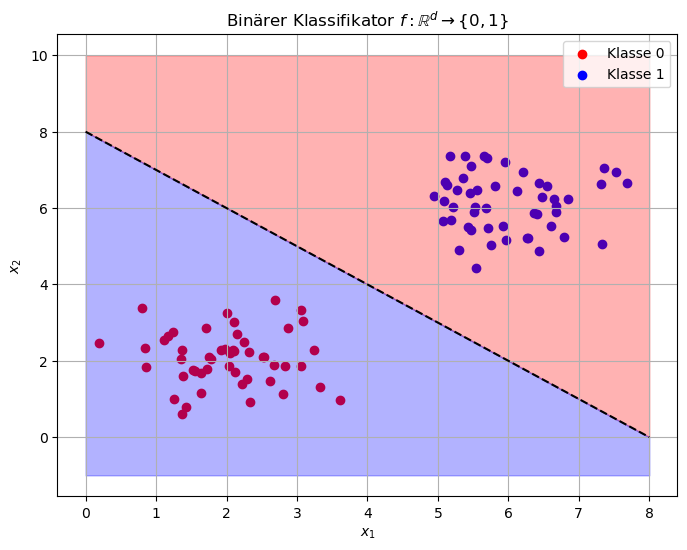

In [1]:
# Visualisierung der Perzeptron Klassifikation aus dem Bild

import matplotlib.pyplot as plt
import numpy as np

# Erzeugung von zufälligen Datenpunkten
np.random.seed(0)
x_class0 = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 50)
x_class1 = np.random.multivariate_normal([6, 6], [[0.5, 0], [0, 0.5]], 50)

x = np.vstack((x_class0, x_class1))
y = np.hstack((np.zeros(50), np.ones(50)))

# Plot der Datenpunkte
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], c='red', label='Klasse 0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], c='blue', label='Klasse 1')

# Entscheidungsebene
x_values = np.linspace(0, 8, 100)
y_values = -1 * x_values + 8  # Beispielhafte Entscheidungsgerade
plt.plot(x_values, y_values, 'k--')

plt.fill_between(x_values, y_values, y2=10, color='red', alpha=0.3)
plt.fill_between(x_values, y_values, y2=-1, color='blue', alpha=0.3)

plt.title(r'Binärer Klassifikator $f : \mathbb{R}^d \rightarrow \{0, 1\}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.show()


## Erklärung

Diese Abbildung zeigt einen binären Klassifikator $f : \mathbb{R}^d \rightarrow \{0, 1\}$, der jeden Punkt $x \in \mathbb{R}^d$ einer der beiden Klassen 0 oder 1 zuweist. Die roten Kreuze repräsentieren Klasse 0 und die blauen Kreuze repräsentieren Klasse 1.

Die gestrichelte schwarze Linie stellt die Entscheidungsgrenze des Klassifikators dar. Diese Linie trennt die beiden Klassen in der zweidimensionalen Ebene. Punkte oberhalb der Linie werden der Klasse 1 zugeordnet, während Punkte unterhalb der Linie der Klasse 0 zugeordnet werden. Die farbigen Flächen (rot und blau) zeigen die Regionen, in denen die jeweiligen Klassen dominiert werden. 

Die Position und der Verlauf der Entscheidungsgrenze basieren auf den Gewichten und dem Bias des Klassifikators, die durch den Lernalgorithmus bestimmt werden. In diesem Beispiel ist die Entscheidungsgrenze eine einfache Gerade, da der Klassifikator ein lineares Modell ist.

## Aufbau


### Erklärung der wesentlichen Komponenten eines Perzeptrons

1. **Eingaben ($x_1, x_2, \ldots, x_n$)**:
   - Dies sind die Eingangswerte, die in das Perzeptron eingespeist werden. Jeder Eingangswert entspricht einem Merkmal oder einer Variable des Eingabedatensatzes.

2. **Gewichte ($w_1, w_2, \ldots, w_n$)**:
   - Jedes Eingangssignal hat ein zugehöriges Gewicht. Diese Gewichte bestimmen die Wichtigkeit der jeweiligen Eingabe und werden während des Trainings angepasst.

3. **Bias ($w_0$)**:
   - Der Bias ist ein zusätzlicher Parameter, der die Entscheidungsgrenze verschiebt. Er hilft dabei, das Modell flexibler zu machen, indem es die Summe der gewichteten Eingaben beeinflusst.

4. **Summationseinheit ($\sum$)**:
   - Diese Komponente berechnet die gewichtete Summe der Eingaben sowie den Bias. Mathematisch ausgedrückt als:
     $$
     z = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n + w_0
     $$

5. **Aktivierungsfunktion ($\alpha$)**:
   - Die Aktivierungsfunktion entscheidet basierend auf der berechneten Summe ($z$), ob das Perzeptron aktiviert wird oder nicht. In einfachen Perzeptronen wird häufig die Heaviside-Funktion verwendet:
     $$
     \alpha(z) = 
     \begin{cases} 
     1 & \text{falls } z \geq 0 \\
     0 & \text{falls } z < 0 
     \end{cases}
     $$

6. **Ausgabe ($y$)**:
   - Das Ergebnis des Perzeptrons, welches entweder 0 oder 1 ist, abhängig vom Ausgang der Aktivierungsfunktion. Diese Ausgabe kann als Vorhersage des Modells interpretiert werden.

Die Abbildung zeigt schematisch, wie diese Komponenten zusammenarbeiten, um eine binäre Klassifikation durchzuführen. Die Eingaben werden gewichtet und summiert, dann durch die Aktivierungsfunktion geleitet, um die finale Entscheidung zu treffen.

### Heaviside Funktion

Die Heaviside Aktivierungsfunktion ist definiert durch:

$$
\alpha(x) = \begin{cases} 
1 & \text{falls } x > 0 \\
0 & \text{anderfalls}
\end{cases}
$$ 

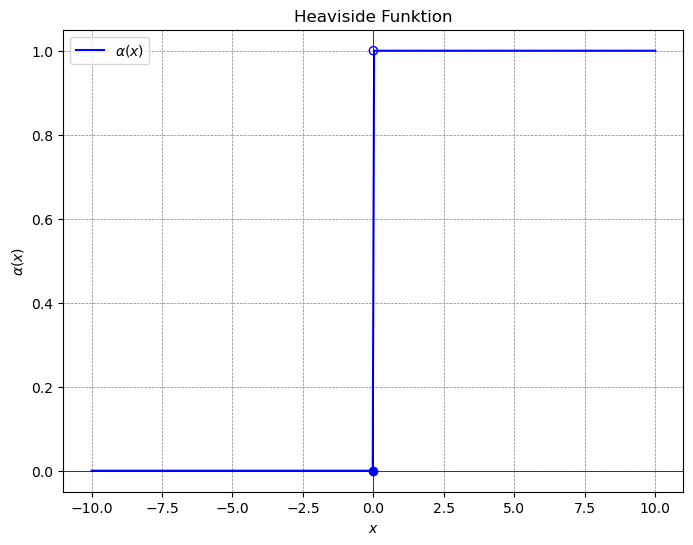

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definition der Heaviside-Funktion
def heaviside(x):
    return np.where(x > 0, 1, 0)

# Erzeugen der x-Werte
x = np.linspace(-10, 10, 400)
y = heaviside(x)

# Plotten der Heaviside-Funktion
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\alpha(x)$', color='blue')
plt.scatter(0, 0, color='blue', zorder=5)  # Punkt (0, 0)
plt.scatter(0, 1, facecolors='none', edgecolors='blue', zorder=5)  # Kreis (0, 1)

# Achsen und Titel
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Heaviside Funktion')
plt.xlabel(r'$x$')
plt.ylabel(r'$\alpha(x)$')
plt.legend()
plt.show()

Ein Perzeptron ist ein binärer Klassifikator $ f : \mathbb{R}^d \rightarrow \{0, 1\} $ definiert durch:

$$
f(x) = \alpha(w \cdot x + w_0)
$$

wobei die Aktivierungsfunktion $ \alpha $ die Heaviside Funktion ist.

## Hyperebene
### Grafische Darstellung der Hyperebene $w \cdot x + w_0 = 0$ im dreidimensionalen Raum


Diese Abbildung zeigt die Hyperebene $w \cdot x + w_0 = 0$ in einem dreidimensionalen Raum. Die Hyperebene trennt den Raum in zwei Bereiche, die jeweils unterschiedlichen Klassifikationen entsprechen.

- **Gewichtungen und Bias**:
  Die Hyperebene wird durch die Gewichtungen ($w_1, w_2, w_3$) und den Bias ($w_0$) definiert. In diesem Beispiel sind die Gewichtungen $w_1 = 1$, $w_2 = 1$, und $w_3 = 1$, und der Bias ist $w_0 = 0$.

- **Punkte auf der Hyperebene**:
  Die roten Punkte auf der Hyperebene sind Beispiele für Punkte, die genau auf der Trennebene liegen. Diese Punkte erfüllen die Gleichung $w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0 = 0$.

- **Trennung des Raums**:
  Die Hyperebene trennt den Raum in zwei Bereiche: Punkte oberhalb der Ebene (positiver Bereich) und Punkte unterhalb der Ebene (negativer Bereich). Dies ist wichtig für die binäre Klassifikation, bei der Punkte in unterschiedlichen Bereichen unterschiedlichen Klassen zugeordnet werden.

Diese grafische Darstellung verdeutlicht, wie die Gewichtungen und der Bias die Trennebene im Raum beeinflussen und wie diese Ebene zur Klassifikation der Datenpunkte verwendet wird.

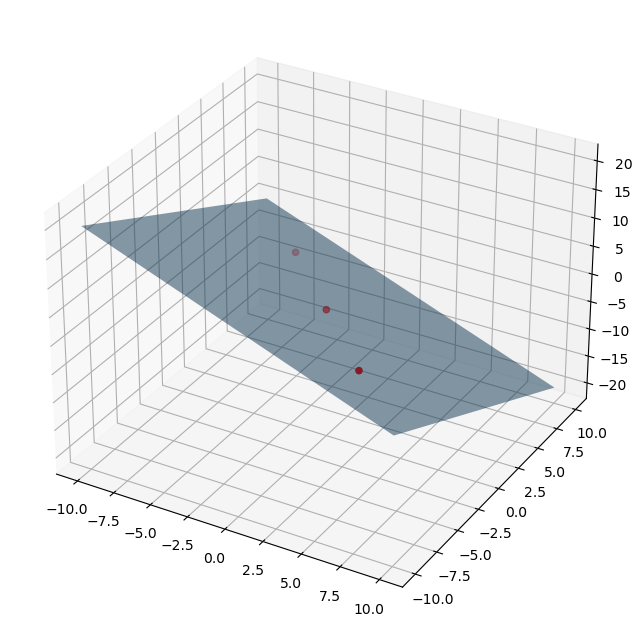

In [3]:
# Gewichtungen und Bias für die Hyperebene
w1, w2, w3, w0 = 1, 1, 1, 0

# Erzeugen von Beispielwerten für x1 und x2
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

# Berechnung der Hyperebene
x3 = (-w1 * x1 - w2 * x2 - w0) / w3

# Plot der Hyperebene
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotten der Hyperebene
ax.plot_surface(x1, x2, x3, alpha=0.5, rstride=100, cstride=100)

# Markierung der Punkte auf der Hyperebene
points = np.array([[-5, 5, 0], [5, -5, 0], [0, 0, 0]])
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')

# Zeichnen einer Linie

### 

Alternative Repräsentation:

In der Literatur wird das Perzeptron auch oft definiert durch:

$
f(x) = \alpha(w \cdot x)
$

Hier ist $ x = (1, x_1, \ldots, x_n)^T$ und $ w = (w_0, w_1, \ldots, w_n)^T $, d.h., $x_0 = 1$ und $w_0$ sind in $ x $ und $ w $ enthalten.

Für ein Perzeptron $ f(x) = \alpha(w \cdot x) $, müssen die Parameter $ w = (w_0, w_1, \ldots, w_n)^T $ mit Hilfe einer Lernregel bestimmt werden.

### Idee eines iterativen Lernalgorithmus:

- Beginne mit einer zufälligen oder festen Wahl für $ w $ z.B. $ w = 0 $
- Bestimme die falsch klassifizierten Datenpunkte
- Versuche iterativ die einzelnen Parameter so zu verändern, dass die Anzahl der falsch klassifizierten Datenpunkte sinkt
- Höre auf sobald keine Verbesserung mehr eintritt

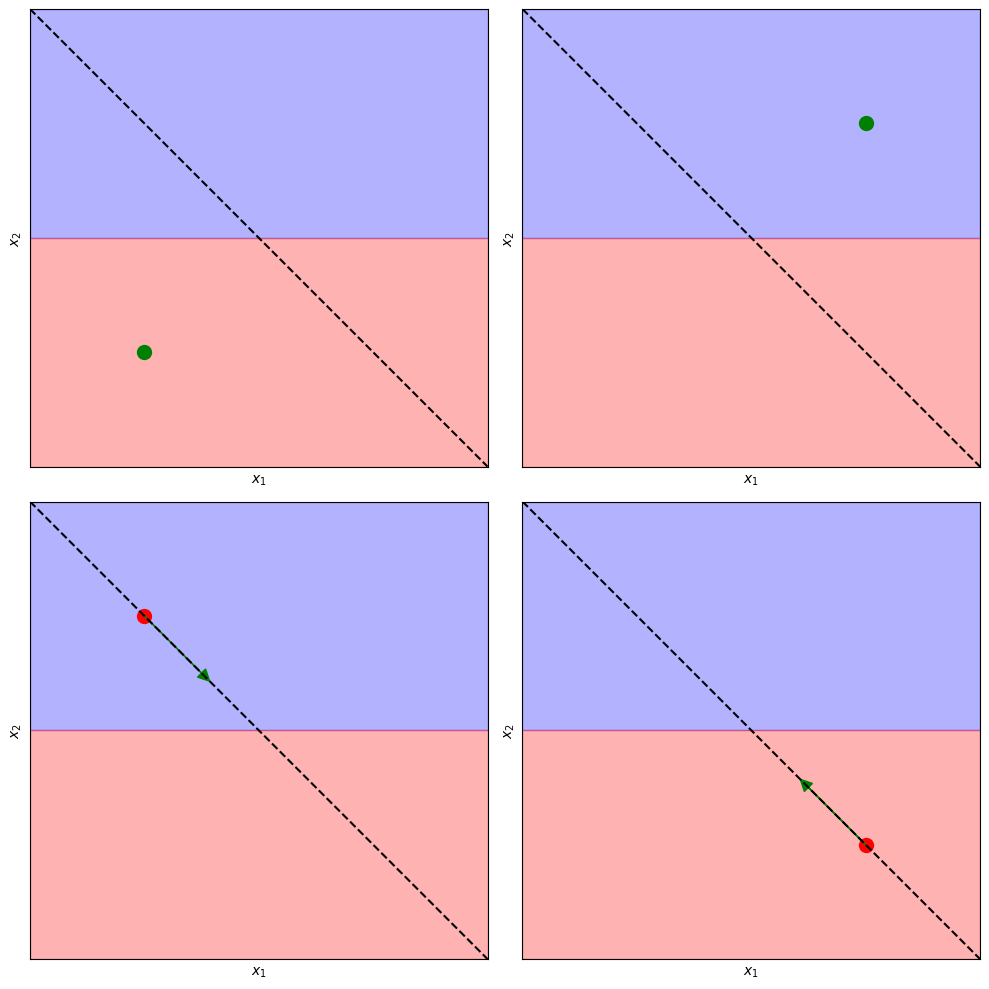

In [4]:
# Zeichnung der vier möglichen Fälle bei binärer Klassifikation
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Festlegen der Farben
colors = ['red', 'blue']
areas = ['red', 'blue']

# Datenpunkte und Entscheidungsgrenze für jeden Fall
cases = [
    {'point': [-1, -1], 'correct': True},
    {'point': [1, 1], 'correct': True},
    {'point': [-1, 1], 'correct': False},
    {'point': [1, -1], 'correct': False}
]

# Zeichnen der vier Fälle
for i, ax in enumerate(axes.flat):
    point = cases[i]['point']
    correct = cases[i]['correct']
    color = 'green' if correct else 'red'
    
    # Zeichnen der Bereiche
    ax.fill_between([-2, 2], [0, 0], [2, 2], color='blue', alpha=0.3)
    ax.fill_between([-2, 2], [-2, -2], [0, 0], color='red', alpha=0.3)
    
    # Zeichnen der Entscheidungsgrenze
    ax.plot([-2, 2], [2, -2], 'k--')
    
    # Zeichnen des Punktes
    ax.scatter(point[0], point[1], color=color, s=100)
    
    # Zeichnen des Pfeils bei falscher Klassifikation
    if not correct:
        ax.arrow(point[0], point[1], 0.5 if point[0] < 0 else -0.5, 0.5 if point[1] < 0 else -0.5,
                 head_width=0.1, head_length=0.1, fc='green', ec='green')
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### Die vier möglichen Fälle bei binärer Klassifikation


Diese Abbildung zeigt die vier möglichen Fälle, die bei der binären Klassifikation auftreten können:

1. **Oben links**:
   - Der Punkt liegt im roten Bereich und ist korrekt klassifiziert (grünes Häkchen).

2. **Oben rechts**:
   - Der Punkt liegt im blauen Bereich und ist korrekt klassifiziert (grünes Häkchen).

3. **Unten links**:
   - Der Punkt liegt im blauen Bereich, sollte jedoch im roten Bereich sein (falsch klassifiziert). Ein grüner Pfeil zeigt die Richtung, in die der Punkt verschoben werden sollte, um korrekt klassifiziert zu werden.

4. **Unten rechts**:
   - Der Punkt liegt im roten Bereich, sollte jedoch im blauen Bereich sein (falsch klassifiziert). Ein grüner Pfeil zeigt die Richtung, in die der Punkt verschoben werden sollte, um korrekt klassifiziert zu werden.

In jeder Abbildung repräsentieren die roten und blauen Bereiche die zwei Klassen. Die gestrichelte Linie ist die Entscheidungsgrenze, die die beiden Klassen trennt.

### Fall 1:

$x$ wurde als Klasse 1 eingestuft, sollte jedoch Klasse 0 sein:

- Falschklassifikation: $f_w(x) = \alpha(w \cdot x) = 1 \Rightarrow w \cdot x > 0$
- Update: $w' = w - x$
- Auswirkung: $w' \cdot x = (w - x) \cdot x = w \cdot x - x \cdot x \geq 0 \Rightarrow w \cdot x - x \cdot x \leq 0 \Rightarrow f_{w'}(x) = \alpha(w \cdot x - x \cdot x) = 0$

### Fall 2:

$x$ wurde als Klasse 0 eingestuft, sollte jedoch Klasse 1 sein:

- Falschklassifikation: $f_w(x) = \alpha(w \cdot x) = 0 \Rightarrow w \cdot x \leq 0$
- Update: $w' = w + x$
- Auswirkung: $w' \cdot x = (w + x) \cdot x = w \cdot x + x \cdot x \geq 0 \Rightarrow w \cdot x + x \cdot x > 0 \Rightarrow f_{w'}(x) = \alpha(w \cdot x + x \cdot x) = 1$

**Lernalgorithmus**

Algorithmus 1: perceptron_learn(\{(x^{(i)}, y^{(i)})\} \subset (\mathbb{R}^d \times \{0, 1\})^n, \gamma)

1. $w = 0$
2. \text{while } \frac{1}{n} \sum_{i=1}^n |y^{(i)} - \alpha(w \cdot x^{(i)})| > \gamma \text{ do}
3. $w' = w$
4. \text{for } i = 1, \ldots, n \text{ do}
5. $o^{(i)} = \alpha(w \cdot x^{(i)})$
6. $w' = w' + (y^{(i)} - o^{(i)}) x^{(i)}$
7. \text{end for}
8. $w = w'$
9. \text{end while}

**Lernalgorithmus**

$(x^{(1)}, y^{(1)}) = ([1, 1]^T, 0)$

$(x^{(2)}, y^{(2)}) = ([1, 2]^T, 1)$

$(x^{(3)}, y^{(3)}) = ([2, 2]^T, 0)$

Iterationen:

1. $w = [0, 0, 0]^T, o^{(1)} = 0 \checkmark, o^{(3)} = 0 \checkmark, o^{(2)} = 0 \text{−} \Rightarrow w = [0, 0, 0]^T + [1, 1, 2]^T = [1, 1, 2]^T$
2. $w = [1, 1, 2]^T, o^{(2)} = 1 \checkmark, o^{(1)} = 1 \text{−}, o^{(3)} = 1 \text{−} \Rightarrow w = [1, 1, 2]^T − [1, 1, 1]^T − [1, 2, 2]^T = [−1,−2,−1]^T$
3. $w = [−1,−2,−1]^T, o^{(1)} = 0 \checkmark, o^{(3)} = 0 \checkmark, o^{(2)} = 0 \text{−} \Rightarrow w = [−1,−2,−1]^T + [1, 1, 2]^T = [0,−1, 1]^T$
4. $w = [0,−1, 1]^T, o^{(1)} = 0 \checkmark, o^{(2)} = 1 \checkmark, o^{(3)} = 0 \checkmark$

### Grenzen des Perzeptrons

Lineare Trennbarkeit:

Probleme wie das Exklusiv-Oder (XOR), welche nicht linear trennbar sind, können von einem Perzeptron nicht gelernt werden.
Ein Perzeptron kann das Exclusiv-Oder nicht lernen, da es keine Gerade gibt, die die beiden Klassen trennt.

Uneindeutigkeit:

Auch wenn ein Problem linear trennbar ist, erhält man mit dem Perzeptron Lernalgorithmus kein eindeutiges Modell. In diesem Beispiel gibt es unendlich viele Geraden, welche die Klassen trennen und der Perzeptron Lernalgorithmus gibt nur eine der Lösungen zurück.

## 5.2 Adaline
## Adaptive Linear Neuron
Es ähnelt im Aufbau dem Perzeptron besitzt jedoch eine andere Aktivierungsfunktion und einen unterschiedlichen Lernalgorithmus genannt Deltaregel.




### Signum Aktivierungsfunktion:

Die Signum Aktivierungsfunktion ist definiert als:

$$
\alpha(x) = \begin{cases} 
1 & \text{falls } x > 0 \\
0 & \text{falls } x = 0 \\
-1 & \text{anderfalls}
\end{cases}
$$



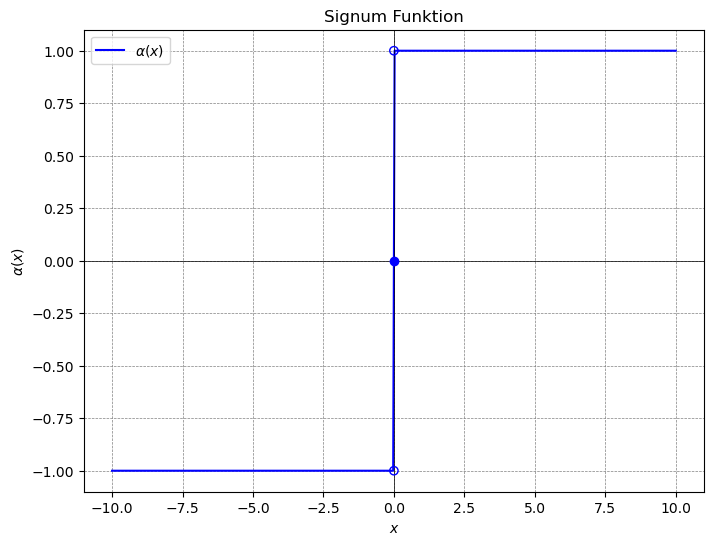

In [5]:


# Definition der Signum-Funktion
def signum(x):
    return np.where(x > 0, 1, np.where(x == 0, 0, -1))

# Erzeugen der x-Werte
x = np.linspace(-10, 10, 400)
y = signum(x)

# Plotten der Signum-Funktion
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\alpha(x)$', color='blue')
plt.scatter(0, 0, color='blue', zorder=5)  # Punkt (0, 0)
plt.scatter(0, 1, facecolors='none', edgecolors='blue', zorder=5)  # Kreis (0, 1)
plt.scatter(0, -1, facecolors='none', edgecolors='blue', zorder=5)  # Kreis (0, -1)

# Achsen und Titel
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Signum Funktion')
plt.xlabel(r'$x$')
plt.ylabel(r'$\alpha(x)$')
plt.legend()
plt.show()


Das Adaline ist ein Binärklassifikator $f : \mathbb{R}^d \rightarrow \{-1, 0, 1\}$ definiert als:

$$
f(x) = \alpha(w \cdot x + w_0)
$$

wobei $\alpha$ die Signum Aktivierungsfunktion ist.

Notation:

Auch hier nehmen wir implizit an, dass $x_0 = 1$ und $w$ den Biasparameter $w_0$ beinhaltet.


## Lernalgorithmus

Wie bei der linearen Regression, verwenden wir beim Adaline ein bekanntes Fehlermaß inspiriert durch die RSS/den MSE in Verbindung mit dem Gradientenabstiegsverfahren, um dem negativen Gradient des Fehlermaßes zum Minimum zu folgen:

Fehlermaß:

$$
E (w)(i) = \frac{1}{2} ( y^{(i)} - f(x^{(i)}) )^2 = \frac{1}{2} ( y^{(i)} - w \cdot x^{(i)} )^2
$$

Ableitung und Gradient:

$$
\frac{\partial E (w)(i)}{\partial w_j} = ( y^{(i)} - w \cdot x^{(i)} ) \frac{\partial}{\partial w_j} ( y^{(i)} - w \cdot x^{(i)} ) = - ( y^{(i)} - w \cdot x^{(i)} ) x^{(i)}_j
$$

$$
\nabla_w E (w)(i) = ( \frac{\partial E (w)(i)}{\partial w_0}, \ldots, \frac{\partial E (w)(i)}{\partial w_n} )^T = - ( y^{(i)} - w \cdot x^{(i)} ) x^{(i)}
$$




Für eine Lernrate $\eta > 0$ und Toleranz $\gamma > 0$ ist der Adaline-Algorithmus:

1. $w = 0$
2. $\text{while } \frac{1}{n} \sum_{i=1}^n |y^{(i)} - \alpha(w \cdot x^{(i)})| > \gamma \text{ do}$
   
   1. $\text{for } i = 1, \ldots, n \text{ do}$
      
      1. $w = w + \eta (y^{(i)} - w \cdot x^{(i)}) x^{(i)}$
   
   2. $\text{end for}$

3. $\text{end while}$

Das Update in Zeile 4 des Adaline Lernalgorithmus ist auch bekannt als Deltaregel.


### Eigenschaften des Adaline
- Aufgrund seiner linearen Natur kann auch das Adaline die XOR-Funktion nicht direkt lernen.
- Je nach Datensatz und Initialisierung ist der Klassfikator eindeutig.